[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


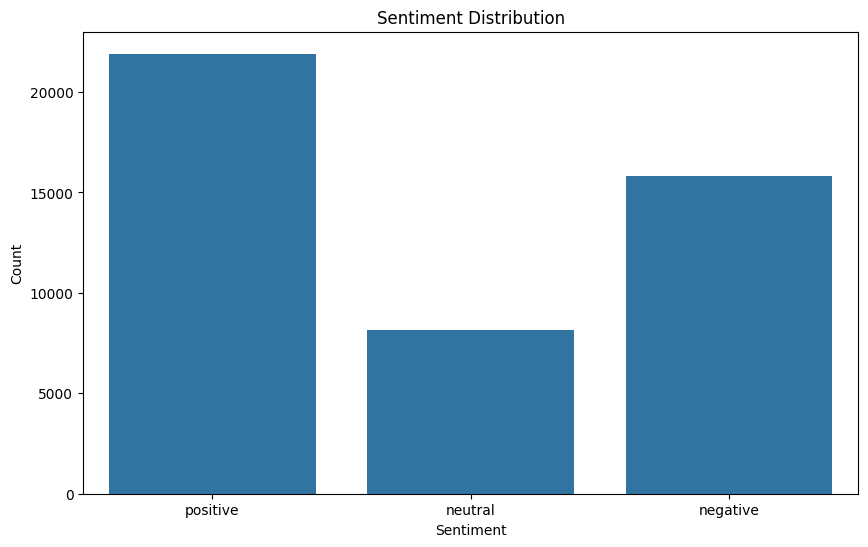

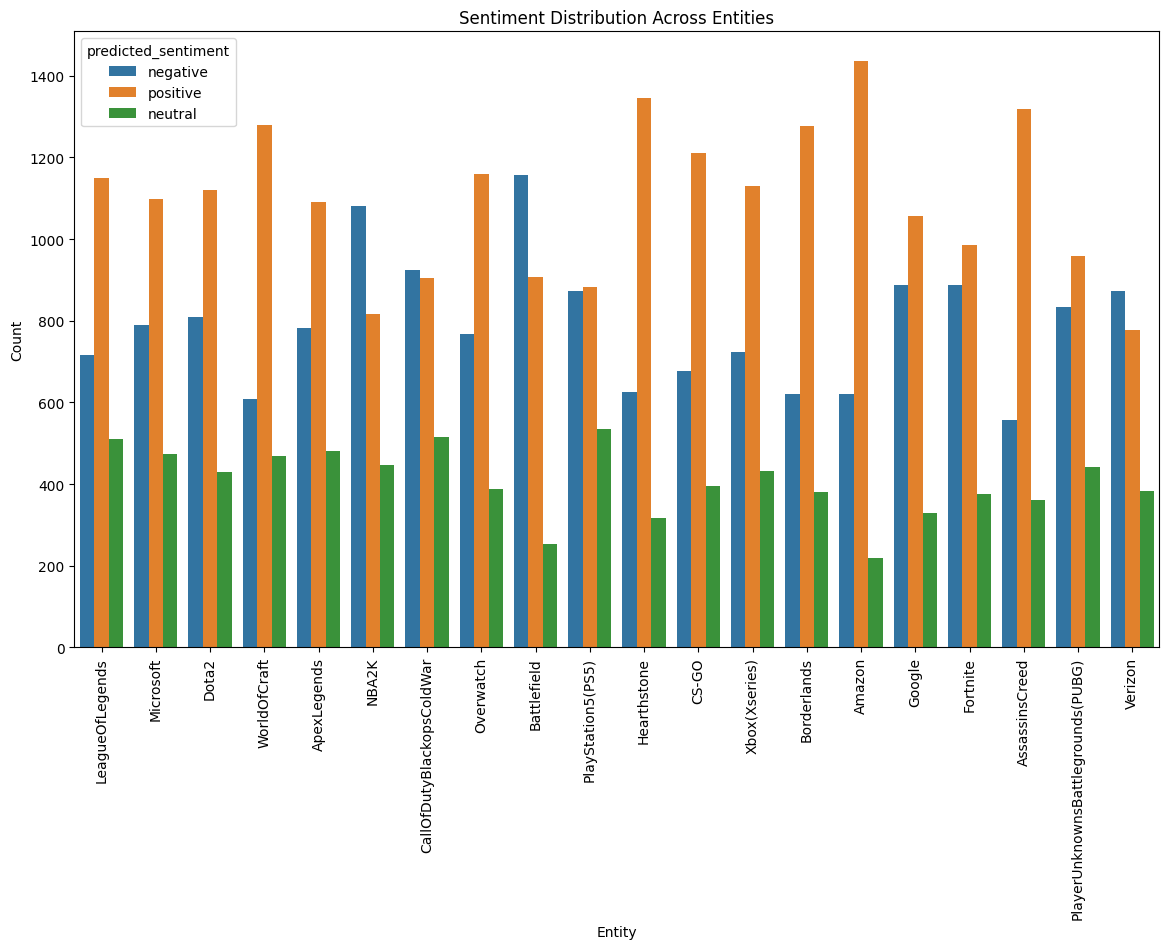

In [ ]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('twitter_training.csv', encoding='latin-1')

df.columns = ['id', 'entity', 'sentiment', 'text']

df.dropna(inplace=True)

df['text'] = df['text'].str.lower()

df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the compound column
df['predicted_sentiment'] = df['compound'].apply(classify_sentiment)

plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_sentiment', data=df, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(x='entity', hue='predicted_sentiment', data=df, order=df['entity'].value_counts().index)
plt.title('Sentiment Distribution Across Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
